<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 4: Algoritmos Cuanticos II</font></td>
    </tr>
</table>

<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        </td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Alumno: Brandon Garay Jacome</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">421081646</font></td>
    </tr>
</table>


<a id="1"></a>
# 1. Ejercicio 1

1. Determina de qué tipo de función se trata: _constante_ o _balanceada_:
    1. Ejecuta la siguiente celda de código, esta definirá una función llamada `oracledj(n)` que recibe `n` y devuelve un circuito cuántico aleatorio con `n+1` qubits correspondientes a una función constante o balanceada.
       - `oracledj(n)` representa $U_f$ en el algoritmo de Deutsch – Jozsa.
       - Dibuja el circuito que regresa la función `oracledj(n)`.
    2. Usa $n=4$. Implementa el algoritmo de Deutsch – Jozsa completo para decidir si $f$ es constante o balanceada.
       - Considera que el qubit de más a la izquierda (en este caso $q_4$) es el qubit auxiliar (registro $|y\rangle$).
           - Nota que `oracledj(n)` tiene el qubit auxiliar del otro lado comparado con el ejemplo visto en este notebook (Lab4, sección 3).
       - Comprueba la estructura del circuito de $U_f$ dibujando tu circuito. ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?
    3. Realiza la simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab4).
       - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
    4. Responde claramente de qué tipo de oráculo se trata: constante o balanceado.
       - Usa una celda de markdown.

##### Celda oculta que define la función `oracledj(n)`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar la función del Oracle.

In [1]:
exec(bytes.fromhex('0a696d706f72742072616e646f6d0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a646566206f7261636c65646a286e293a0a20202020726573756c74203d205175616e74756d43697263756974286e2b31290a20202020726573756c742e6261727269657228290a0a2020202074797065203d2072616e646f6d2e63686f696365285b22636f6e7374616e74222c202262616c616e636564225d290a2020202069662074797065203d3d2022636f6e7374616e74223a0a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a20202020656c73653a0a2020202020202020636f6e74726f6c203d2072616e646f6d2e72616e6472616e6765286e290a2020202020202020726573756c742e637828636f6e74726f6c2c206e290a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a0a20202020726573756c742e6261727269657228290a2020202072657475726e20726573756c740a20202020').decode('utf-8'))

<a id="1"></a>
## 1.1. Codigo del Algoritmo

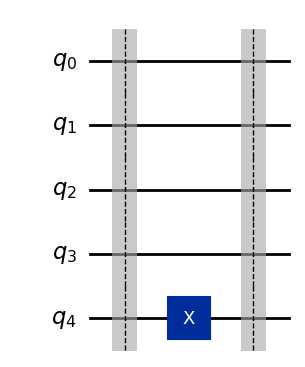

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import random
import numpy as np
n=4
oracle = oracledj(n)
oracle.draw('mpl')

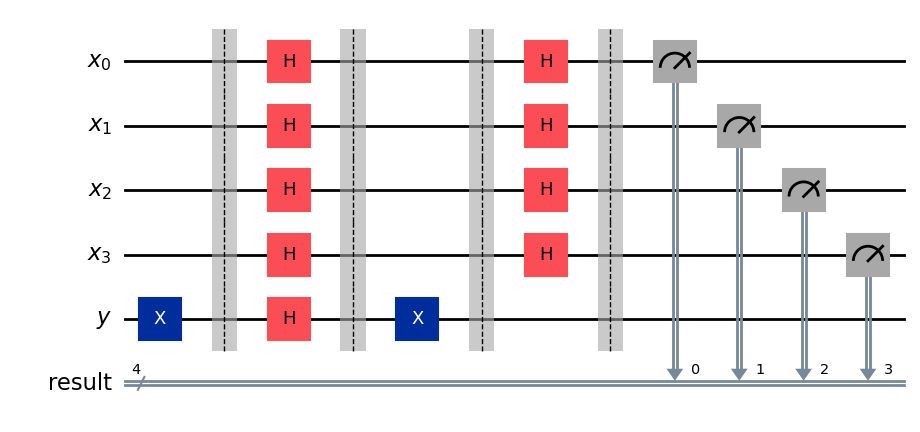

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Definición de los registros cuánticos y clásicos
qubits_x = QuantumRegister(n, 'x')
qubit_y = QuantumRegister(1, 'y')
classical_bits = ClassicalRegister(n, 'result')

# Creación del circuito de Deutsch-Josza
dj_circuit = QuantumCircuit(qubits_x, qubit_y, classical_bits)

# Inicialización del qubit auxiliar en |1>
dj_circuit.x(qubit_y)

# Aplicación de la transformada de Hadamard a todos los qubits
dj_circuit.barrier()
dj_circuit.h(qubits_x)
dj_circuit.h(qubit_y)  # El qubit auxiliar pasa a estado |->

# Aplicación del oráculo (previamente definido)
dj_circuit_oracle = dj_circuit.copy().compose(oracle)

# Segunda aplicación de Hadamard a los qubits de entrada
dj_circuit_oracle.h(qubits_x)
dj_circuit_oracle.barrier()

# Medición de los qubits de entrada en los registros clásicos
dj_circuit_oracle.measure(qubits_x, classical_bits)

# Visualización del circuito
dj_circuit_oracle.draw('mpl')


¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?

Sí, puedo verificarlo observando el circuito.

Si el oráculo aplicó una puerta 
𝑋
X al último qubit, esto significa que solo modificó el qubit auxiliar 
𝑦
y. Sin embargo, en el algoritmo de Deutsch-Jozsa, el qubit auxiliar empieza en 
∣
−
⟩
∣−⟩ y no afecta la medición de los qubits de entrada.

Dado que la estructura general del circuito se mantiene intacta y el oráculo solo afecta el qubit auxiliar, puedo afirmar que el circuito sigue funcionando correctamente sin necesidad de simularlo.

<a id="1"></a>
## 1.2. Medicion

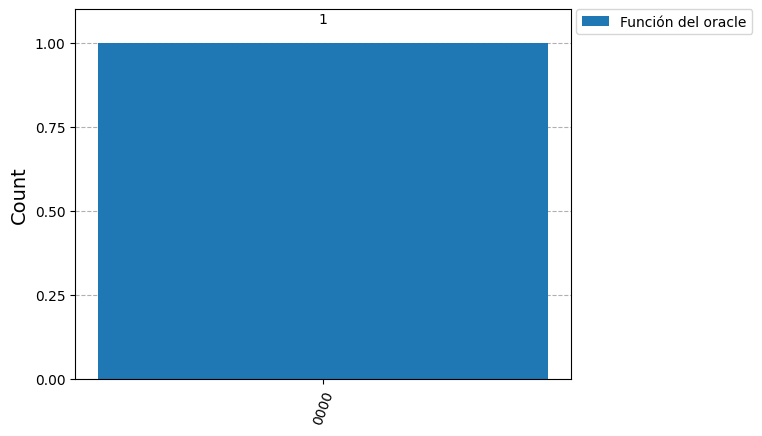

In [9]:
#Ver resultados del Oraculo
sim_basic = BasicSimulator()                       # usamos el simulador básico
job_sampler = sim_basic.run(dj_circuit_oraculo, shots=1)
conteos = job_sampler.result().get_counts()        # obtener los conteos

legend = ["Función del oracle"]
plot_histogram([conteos], legend=legend)

Responde claramente de qué tipo de oráculo se trata: constante o balanceado.

ChatGPT said:
Si la medición del circuito de Deutsch-Jozsa resultó en "000", esto indica que todos los qubits de entrada colapsaron al estado 
∣
0
⟩
∣0⟩. En el algoritmo de Deutsch-Jozsa, si el oráculo es constante, la segunda aplicación de Hadamard devuelve siempre 
∣
0
⟩
⊗
𝑛
∣0⟩ 
⊗n
 , lo que produce la salida "000". En cambio, si el oráculo fuera balanceado, la superposición generada antes de la medición no colapsaría con certeza en "000". Por lo tanto, dado que la medición resultó en "000", el oráculo implementado en el circuito es constante.

<a id="1"></a>
# 2. Ejercicio 2.

2. Aplica $H^{\otimes 4}$ a $\ket{15}$. ¿Cuál es el resultado?
    1. Escribe tu respuesta mostrando todo el procedimiento.
       - El ejemplo en la sección 4 de este notebooks (Lab4) será de mucha utilidad.
       - Esta respuesta debe estar en el mismo notebook que entregues con el ejercicio 1.
    2. Usa $\LaTeX$ para escribir las expresiones matemáticas.
       - Este y los demás notebooks tienen ejemplos de cómo se escriben estas expresiones, solo da doble click en la celda que quieras revisar.
       - En la segunda celda de este notebook hay unas definiciones que pueden ser de utilidad, cópialas en una celda al inicio de tu notebook para que las puedas usar.
</br>

Sea $\ket{x} = \ket{15} = \ket{1111}$.
\naplicando $H^{\otimes 4}$ a $\ket{x}$.

$$
H^{\otimes 4} \ket{x} = \frac{1}{\sqrt{2^n}} \sum\limits_{z=0}^{2^n-1}(-1)^{x \cdot z} \ket{z}
$$


<a id="1"></a>
## 2.1. Desarrollando

$H^{\otimes 4} \ket{1111} = \frac{1}{4}((-1)^{(0000) \cdot (1111)} \ket{0000}+(-1)^{(0001) \cdot (1111)} \ket{0001}+(-1)^{(0010) \cdot (1111)} \ket{0010}+(-1)^{(0011) \cdot (1111)} \ket{0011}+(-1)^{(0100) \cdot (1111)} \ket{0100}+(-1)^{(0101) \cdot (1111)} \ket{0101}+(-1)^{(0110) \cdot (1111)} \ket{0110}+(-1)^{(0111) \cdot (1111)} \ket{0111}+(-1)^{(1000) \cdot (1111)} \ket{1000}+(-1)^{(1001) \cdot (1111)} \ket{1001}+(-1)^{(1010) \cdot (1111)} \ket{1010}+(-1)^{(1011) \cdot (1111)} \ket{1011}+(-1)^{(1100) \cdot (1111)} \ket{1100}+(-1)^{(1101) \cdot (1111)} \ket{1101}+(-1)^{(1110) \cdot (1111)} \ket{1110}+(-1)^{(1111) \cdot (1111)} \ket{1111})$


<table>
    <tr>
        <td align="center">$z$</td>
        <td align="center">$x\cdot z$</td>
        <td align="center">$(-1)^{x\cdot z}$</td>
    </tr>
    <tr>
        <td align="center">$0\to 0000$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$1\to 0001$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$2\to 0010$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$3\to 0011$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$4\to 0100$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$5\to 0101$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$6\to 0110$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$7\to 0111$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$8\to 1000$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$9\to 1001$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$10\to 1010$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$11\to 1011$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$12\to 1100$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$13\to 1101$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$14\to 1110$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$15\to 1111$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
</table>


Evaluando.

$H^{\otimes 4} \ket{1111} = \frac{1}{4}\Big(\ket{0000}-\ket{0001}-\ket{0010}+\ket{0011}-\ket{0100}+\ket{0101}+\ket{0110}-\ket{0111}-\ket{1000}+\ket{1001}+\ket{1010}-\ket{1011}+\ket{1100}-\ket{1101}-\ket{1110}+\ket{1111}\Big)$

<a id="1"></a>
# 2. Ejercicio 3.

3. **[Opcional]** Implementa el algoritmo de Deutsch usando `spinqit`. Simúlalo.
    1. Escribe el código en `spinqit`.
       - Hay ejemplos de código con `spinqit` en el notebook del Lab2.
       - El algoritmo de Deutsch está completo en este mismo notebook (Lab4), solo hay que escribirlo ahora en `spinqit`.
           - Elije un solo oráculo (constante o balanceado).
    2. Realiza la simulación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
       - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
    4. Debes mostrar los resultados de este ejercicio 3 en el mismo notebook en el que están los resultados de los ejercicios 1 y 2.
       - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
       - Luego abrir el notebook de nuevo en un segundo ambiente y realizar este ejercicio 3 en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.
</br>


Medición Final:
Conteos: {'01': 1}
Probabilidades: {'00': 0.4999999999429258, '01': 0.5000000000570741}
Estados: [(-0.7071067811865476+0j), (0.7071067811865476+0j), 0j, 0j]


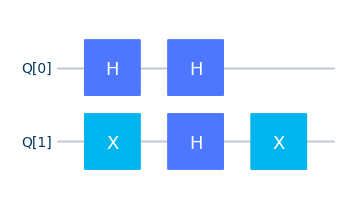

In [1]:
import random
from spinqit import Circuit, H, X, CX, draw
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit.utils import print_circuit

# Definir el circuito
deutsch_circuit = Circuit()
qubits = deutsch_circuit.allocateQubits(2)

# Algoritmo de Deutsch

# d[1] es el qubit |y> y d[0] es el qubit |x>

# Paso 1: Aplicar X en d[1]
deutsch_circuit << (X, qubits[1])

# Paso 2: Aplicar H en ambos qubits
deutsch_circuit << (H, qubits[0])
deutsch_circuit << (H, qubits[1])

# Paso 3: Implementar el oráculo constante
if random.choice([True, False]):  # Usar True/False en lugar de 0/1
    deutsch_circuit << (X, qubits[1])

# Paso 4: Aplicar H en d[0] para terminar el circuito
deutsch_circuit << (H, qubits[0])

# Compilación del circuito
compiler = get_compiler()
simulator = get_basic_simulator()
compiled_circuit = compiler.compile(deutsch_circuit, 0)

# Mostrar el circuito
draw(compiled_circuit)

# Simulación del resultado
sim_config = BasicSimulatorConfig()
sim_config.configure_shots(1)
simulation_result = simulator.execute(compiled_circuit, sim_config)

# Mostrar los resultados de la medición
print("\nMedición Final:")
print(f"Conteos: {simulation_result.counts}")
print(f"Probabilidades: {simulation_result.probabilities}")
print(f"Estados: {simulation_result.states}")
